### Implementation of Classification Model

In this notebook we go implement different models to classification to determine whether mushrooms are edible, it is necessary to collect mushrooms with different characteristic attributes and analyze whether they are toxic in the mushroom dataset.

Like we saw in the analysis notebook, it is suggested to implement complex models, therefore we are gone to implement random forest, gradient boost and neuronal networks and analyzing which is better to solve this problem.

#### Import and Adjust Data

In [1]:
# Libraries to use
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Importing the dataset
mushroom_dataset = pd.read_csv('../assets/data/mushroom.csv')
mushroom_dataset = mushroom_dataset.drop(columns=['stalk-root'])
mushroom_dataset.head()

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,f,n,f,n,f,w,n,b,...,y,w,p,NaN,n,o,p,w,v,NaN
1,p,NaN,y,g,t,NaN,f,c,b,k,...,s,n,c,p,w,n,e,NaN,y,g
2,e,b,y,n,t,n,f,c,NaN,n,...,s,p,NaN,p,w,o,p,b,y,w
3,e,x,g,g,t,n,f,w,b,n,...,s,p,NaN,p,w,n,n,NaN,NaN,d
4,e,NaN,f,NaN,t,n,a,w,n,n,...,k,NaN,w,p,w,NaN,l,w,v,d


In [3]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

mushroom_dataset = pd.DataFrame(imputer.fit_transform(mushroom_dataset), columns=mushroom_dataset.columns)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

mushroom_dataset_encoded = mushroom_dataset.apply(label_encoder.fit_transform)


X = mushroom_dataset_encoded.drop(columns=['class'])
y = mushroom_dataset_encoded['class']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**Note**: As we saw in the frequency analysis in the 'Stalk-root' have many values of ?, therefore, we will not tend this column to implement the models. 


#### Random Forest Model

In [6]:
from sklearn.ensemble import RandomForestClassifier

classifier_RF = RandomForestClassifier(n_estimators=100, random_state=0)
classifier_RF.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [7]:
y_pred_RF = classifier_RF.predict(X_test)

Accuracy of Random Forest Classifier:  0.7266430660304756


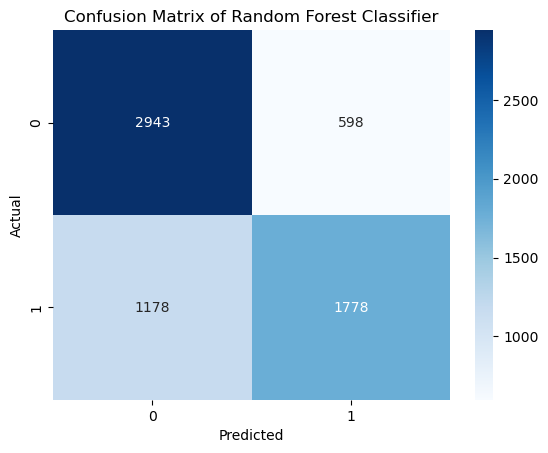

Classification Report of Random Forest Classifier: 
              precision    recall  f1-score   support

      Edible       0.71      0.83      0.77      3541
   Poisonous       0.75      0.60      0.67      2956

    accuracy                           0.73      6497
   macro avg       0.73      0.72      0.72      6497
weighted avg       0.73      0.73      0.72      6497



In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

accuracy_RF = accuracy_score(y_test, y_pred_RF)
print('Accuracy of Random Forest Classifier: ', accuracy_RF)

confusion_matrix_RF = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(confusion_matrix_RF, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

classification_report_RF = classification_report(y_test, y_pred_RF, target_names=['Edible', 'Poisonous'])
print(f'Classification Report of Random Forest Classifier: \n{classification_report_RF}')

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

# Define parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_features': ['log2', 'sqrt'],
    'max_depth': [15, 20],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

classifier_RF = RandomForestClassifier(random_state=0)

# Create score to optimize the poison class
recall_score = make_scorer(recall_score, pos_label=1)

# Initialize GridSearchCV
grid_search_RF = GridSearchCV(estimator=classifier_RF, param_grid=param_grid, scoring=recall_score, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_RF.fit(X_train, y_train)

# Best parameters
print(f'Best parameters: {grid_search_RF.best_params_}')

# Best estimator
best_rf_model = grid_search_RF.best_estimator_


Fitting 5 folds for each of 144 candidates, totalling 720 fits


c:\Users\nicla\miniconda3\envs\mushroom-classification-enhanced\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 150}


Tuned Model Accuracy: 0.73


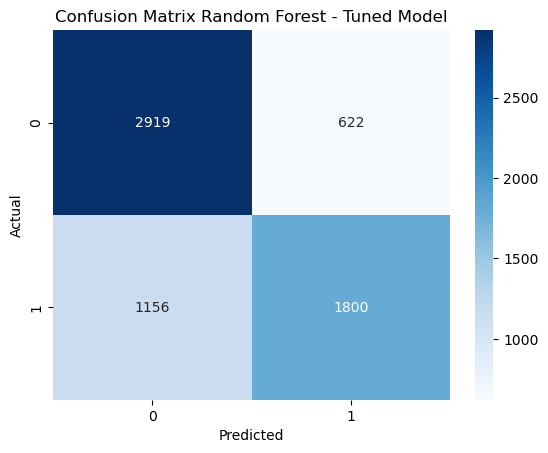

In [10]:
# Make predictions with the best model
best_y_pred_RF = best_rf_model.predict(X_test)

# Calculate accuracy
best_accuracy_RF = accuracy_score(y_test, best_y_pred_RF)
print(f'Tuned Model Accuracy: {best_accuracy_RF:.2f}')

# Generate a confusion matrix
best_conf_matrix_RF = confusion_matrix(y_test, best_y_pred_RF)
sns.heatmap(best_conf_matrix_RF, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Random Forest - Tuned Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
best_class_report_RF = classification_report(y_test, best_y_pred_RF, target_names=['Edible', 'Poisonous'], output_dict=True)


1. **Class Imbalance**:
    
    The recall for the poisonous class (0.61) is significantly lower than that of the edible class (0.82). This indicates that the model is less effective at identifying all the poisonous mushrooms, which is a critical issue given the potential risks associated with misclassifying poisonous mushrooms as edible.

2. **Precision vs. Recall**:

    The precision for both classes is relatively balanced (0.72 for edible and 0.74 for poisonous). However, the lower recall for the poisonous class suggests that the model might benefit from adjustments to better capture poisonous mushrooms.

3. **Overall Model Performance**:

    An accuracy of 0.73 is reasonable but leaves room for improvement. Enhancing the model's ability to identify poisonous mushrooms should be a priority.

#### Gradient Boost

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

classifier_GB = GradientBoostingClassifier(n_estimators=100, random_state=0)
classifier_GB.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [12]:
y_pred_GB = classifier_GB.predict(X_test)

Accuracy of Random Forest Classifier:  0.734338925657996


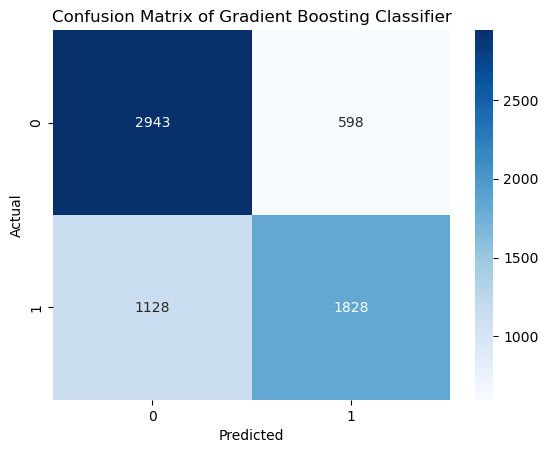

Classification Report of Gradient Boosting Classifier: 
              precision    recall  f1-score   support

      Edible       0.72      0.83      0.77      3541
   Poisonous       0.75      0.62      0.68      2956

    accuracy                           0.73      6497
   macro avg       0.74      0.72      0.73      6497
weighted avg       0.74      0.73      0.73      6497



In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

accuracy_GB = accuracy_score(y_test, y_pred_GB)
print('Accuracy of Random Forest Classifier: ', accuracy_GB)

confusion_matrix_GB = confusion_matrix(y_test, y_pred_GB)
sns.heatmap(confusion_matrix_GB, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Gradient Boosting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

classification_report_GB = classification_report(y_test, y_pred_GB, target_names=['Edible', 'Poisonous'])
print(f'Classification Report of Gradient Boosting Classifier: \n{classification_report_GB}')

In [14]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.01, 0.07],
    'max_depth': [3, 1],
    'min_samples_split': [2, 5, 1],
    'min_samples_leaf': [1, 3]
}

# Create score to optimize the poison class
recall_score = make_scorer(recall_score, pos_label=1)

# Initialize GridSearchCV
grid_search_GB = GridSearchCV(estimator=classifier_GB, param_grid=param_grid, scoring=recall_score, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_GB.fit(X_train, y_train)

# Best parameters
print(f'Best parameters: {grid_search_GB.best_params_}')

# Best estimator
best_gb_model = grid_search_GB.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\nicla\miniconda3\envs\mushroom-classification-enhanced\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\nicla\miniconda3\envs\mushroom-classification-enhanced\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\nicla\miniconda3\envs\mushroom-classification-enhanced\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\nicla\miniconda3\envs\mushroom-classification-enh

Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Tuned Model Accuracy: 0.73


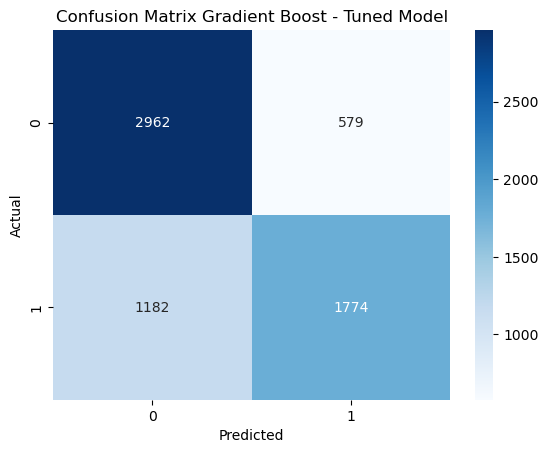

In [15]:
# Make predictions with the best model
best_y_pred_GB = best_gb_model.predict(X_test)

# Calculate accuracy
best_accuracy_GB = accuracy_score(y_test, best_y_pred_GB)
print(f'Tuned Model Accuracy: {best_accuracy_GB:.2f}')

# Generate a confusion matrix
best_conf_matrix_GB = confusion_matrix(y_test, best_y_pred_GB)
sns.heatmap(best_conf_matrix_GB, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Gradient Boost - Tuned Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
best_class_report_GB = classification_report(
    y_test, best_y_pred_GB, target_names=['Edible', 'Poisonous'], output_dict=True)

#### Neuronal Network

In [16]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report


In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
from tensorflow.keras.metrics import Recall, Accuracy
from tensorflow.keras.optimizers import Adam

def create_model_NN(optimizer='adam', activation='relu', dropout=0.1, neurons=128):
    neuronal_model = Sequential()
    neuronal_model.add(Input(shape=(X_scaled.shape[1],)))
    neuronal_model.add(Dense(neurons, activation=activation))
    neuronal_model.add(Dropout(rate=dropout))
    neuronal_model.add(Dense(neurons//2, activation=activation))
    neuronal_model.add(Dropout(rate=dropout))
    neuronal_model.add(Dense(2, activation='softmax'))
    neuronal_model.compile(
        optimizer=optimizer, loss='categorical_crossentropy', metrics=[Recall(),'accuracy'])
    return neuronal_model

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

In [20]:
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

In [21]:
neuronal_model = create_model_NN(optimizer=Adam(learning_rate=0.001), dropout=0.1, neurons=256)
# neuronal_model = create_model_NN()
history_NN = neuronal_model.fit(X_train, y_train_cat, batch_size=32, epochs=100, validation_data=(X_test, y_test_cat))

Epoch 1/100
610/610 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5954 - loss: 0.6699 - recall: 0.5954 - val_accuracy: 0.6755 - val_loss: 0.6201 - val_recall: 0.6755
Epoch 2/100
610/610 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6759 - loss: 0.6120 - recall: 0.6759 - val_accuracy: 0.6886 - val_loss: 0.5977 - val_recall: 0.6886
Epoch 3/100
610/610 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6952 - loss: 0.5883 - recall: 0.6952 - val_accuracy: 0.7005 - val_loss: 0.5852 - val_recall: 0.7005
Epoch 4/100
610/610 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7131 - loss: 0.5702 - recall: 0.7131 - val_accuracy: 0.7036 - val_loss: 0.5766 - val_recall: 0.7036
Epoch 5/100
610/610 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7178 - loss: 0.5586 - recall: 0.7178 - val_accuracy: 0.7002 - val_loss: 0.5866 - val_recall: 0.7002
Epoch 6/100
610/610 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7253 - loss: 0.5519 - recall: 0.7253 - val_accuracy: 0.7026 - val_loss: 0.5848 - val_recall: 0.702

In [22]:
neuronal_model.evaluate(X_test, y_test_cat)

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6561 - loss: 1.0669 - recall: 0.6561


[1.082666039466858, 0.6569185853004456, 0.6569185853004456]

In [23]:
y_pred_NN = neuronal_model.predict(X_test)
y_pred_classes_NN = np.argmax(y_pred_NN, axis=1)
y_test_classes_NN = np.argmax(y_test_cat, axis=1)

204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [24]:
classification_report_NN = classification_report(y_test_classes_NN, y_pred_classes_NN, target_names=['Edible', 'Poisonous'], output_dict=True)

#### Compare Models

In [25]:
def extract_metrics(report):
    metrics = {
        'precision': [report['Edible']['precision'], report['Poisonous']['precision'], report['macro avg']['precision']],
        'recall': [report['Edible']['recall'], report['Poisonous']['recall'], report['macro avg']['recall']],
        'f1-score': [report['Edible']['f1-score'], report['Poisonous']['f1-score'], report['macro avg']['f1-score']],
        'support': [report['Edible']['support'], report['Poisonous']['support'], report['macro avg']['support']]
    }
    return pd.DataFrame(metrics, index=['Edible', 'Poisonous', 'Macro Avg'])

# Extract metrics from each report
rf_metrics = extract_metrics(best_class_report_RF)
gb_metrics = extract_metrics(best_class_report_GB)
nn_metrics = extract_metrics(classification_report_NN)

# Combine metrics into a single DataFrame
metrics_df = pd.concat([rf_metrics, gb_metrics, nn_metrics], keys=['Random Forest', 'Gradient Boosting', 'Neural Network'])

# Print the combined metrics DataFrame
print(metrics_df)

                             precision    recall  f1-score  support
Random Forest     Edible      0.716319  0.824343  0.766544   3541.0
                  Poisonous   0.743187  0.608931  0.669394   2956.0
                  Macro Avg   0.729753  0.716637  0.717969   6497.0
Gradient Boosting Edible      0.714768  0.836487  0.770852   3541.0
                  Poisonous   0.753931  0.600135  0.668299   2956.0
                  Macro Avg   0.734350  0.718311  0.719576   6497.0
Neural Network    Edible      0.681516  0.695566  0.688470   3541.0
                  Poisonous   0.626084  0.610622  0.618257   2956.0
                  Macro Avg   0.653800  0.653094  0.653363   6497.0


Based on the performance evaluation of the machine learning models, the following observations and conclusions can be made:

- **Gradient Boosting** consistently outperforms the other models across all key metrics. It achieves the highest average precision (0.734), recall (0.718), and F1-score (0.720). This indicates that Gradient Boosting is the most effective model for this dataset, providing a balanced performance in both identifying positive instances and maintaining accuracy.

- **Random Forest** also demonstrates strong performance, particularly in recall for the "Edible" class. With an average precision of 0.730, recall of 0.717, and F1-score of 0.718, it is a reliable alternative to Gradient Boosting. The Random Forest model performs well overall but slightly lags behind Gradient Boosting in precision and F1-score.

- **Neural Network** shows lower performance compared to both Gradient Boosting and Random Forest. It has the lowest average precision (0.654), recall (0.653), and F1-score (0.653). This suggests that the Neural Network may require further tuning or may not be the most suitable model for this particular classification problem.

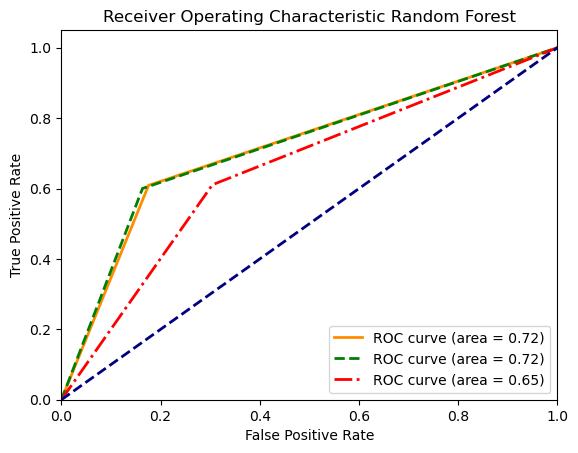

In [32]:
from sklearn.metrics import roc_curve, auc

# ROC and AUC curves
fpr_RF, tpr_RF, _ = roc_curve(y_test, best_y_pred_RF)
fpr_GB, tpr_GB, _ = roc_curve(y_test, best_y_pred_GB)
fpr_NN, tpr_NN, _ = roc_curve(y_test_classes_NN, y_pred_classes_NN)

roc_auc_RF = auc(fpr_RF, tpr_RF)
roc_auc_GB = auc(fpr_GB, tpr_GB)
roc_auc_NN = auc(fpr_NN, tpr_NN)

plt.figure()
plt.plot(fpr_RF, tpr_RF, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_RF)
plt.plot(fpr_GB, tpr_GB, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_GB, linestyle='--')
plt.plot(fpr_NN, tpr_NN, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_NN, linestyle='-.')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Random Forest')
plt.legend(loc='lower right')
plt.show()

**The ROC curves** for Random Forest and Gradient Boosting models indicate an equal performance level in terms of their ability to distinguish between the positive and negative classes, with both models achieving an AUC of 0.72. This AUC value suggests that both models have a moderate capability to correctly classify instances across various thresholds. Since the AUC scores are identical, this suggests that the models perform similarly in terms of overall discriminatory power. As both models show comparable performance in ROC analysis, further consideration should be given to other evaluation metrics, such as precision, recall, and F1-score, as well as practical factors such as model interpretability and computational requirements.

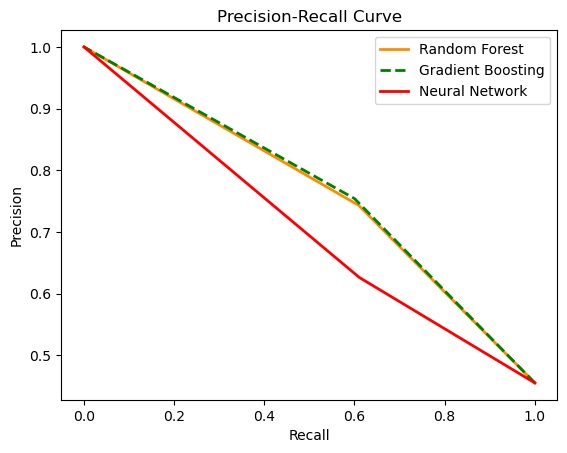

In [36]:
from sklearn.metrics import precision_recall_curve

# Curve precision - recall
precision_RF, recall_RF, _ = precision_recall_curve(y_test, best_y_pred_RF)
precision_GB, recall_GB, _ = precision_recall_curve(y_test, best_y_pred_GB)
precision_NN, recall_NN, _ = precision_recall_curve(y_test_classes_NN, y_pred_classes_NN)

plt.figure()
plt.plot(recall_RF, precision_RF, color='darkorange', lw=2, label='Random Forest')
plt.plot(recall_GB, precision_GB, color='green', lw=2, label='Gradient Boosting', linestyle='--')
plt.plot(recall_NN, precision_NN, color='red', lw=2, label='Neural Network')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

**The precision-recall curves** for both Random Forest and Gradient Boosting models are similar, indicating that both models perform comparably in terms of precision and recall. The curves show that each model maintains a balanced trade-off between precision and recall across different decision thresholds. This similarity in performance suggests that both models handle class imbalance effectively and make similarly accurate predictions. Given that the precision-recall curves do not reveal significant differences, further analysis of other performance metrics and practical considerations such as computational efficiency, interpretability, and model robustness is recommended to select the best model for deployment.

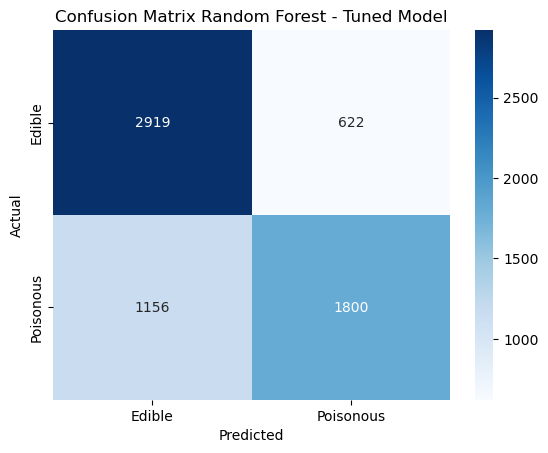

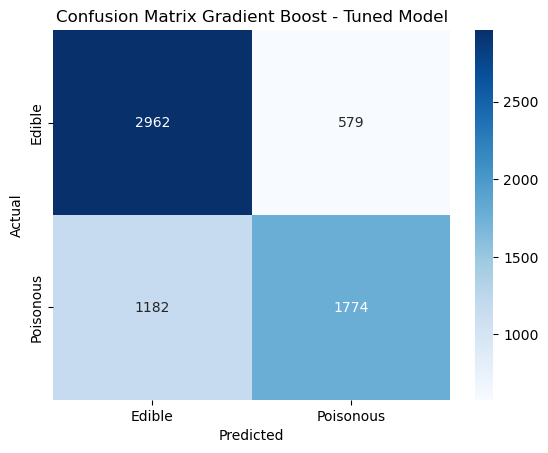

In [38]:
cm_rf = confusion_matrix(y_test, best_y_pred_RF)
cm_gb = confusion_matrix(y_test, best_y_pred_GB)

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.title('Confusion Matrix Random Forest - Tuned Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.title('Confusion Matrix Gradient Boost - Tuned Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

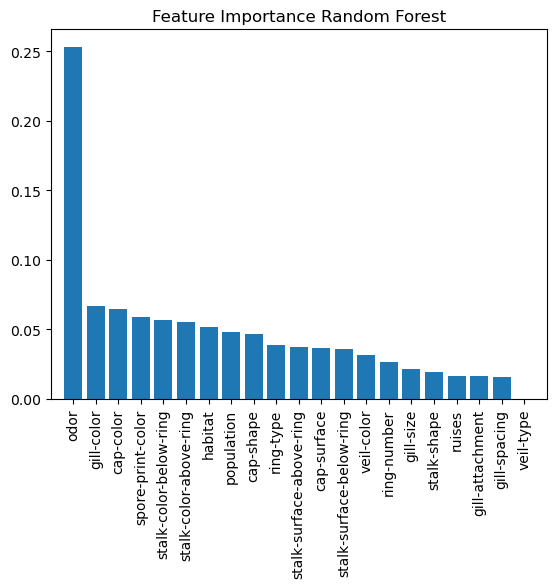

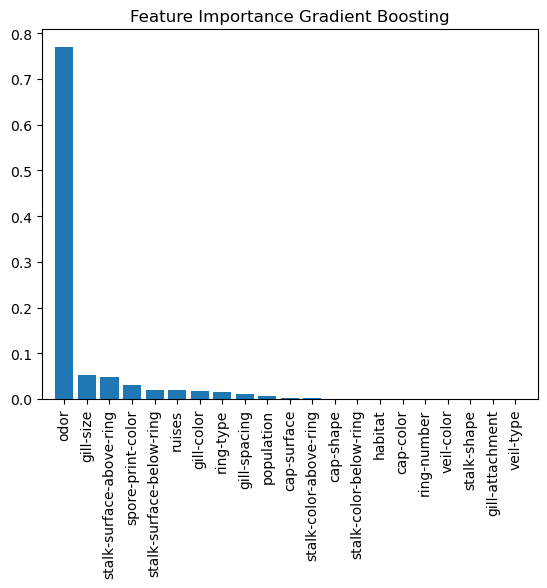

In [39]:
# Feature importance Random Forest
feature_importance_RF = best_rf_model.feature_importances_
indices_RF = np.argsort(feature_importance_RF)[::-1]
plt.figure()
plt.title('Feature Importance Random Forest')
plt.bar(range(X.shape[1]), feature_importance_RF[indices_RF], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices_RF], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Feature importance Gradient Boosting
feature_importance_GB = best_gb_model.feature_importances_
indices_GB = np.argsort(feature_importance_GB)[::-1]
plt.figure()
plt.title('Feature Importance Gradient Boosting')
plt.bar(range(X.shape[1]), feature_importance_GB[indices_GB], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices_GB], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

The feature importance analysis reveals distinct characteristics of the Gradient Boosting (GB) and Random Forest (RF) models:

- **Gradient Boosting (GB)**: This model highlights a few key features as highly important, with the top feature having a significance of 0.77. Many other features have very low or zero importance, suggesting that GB relies heavily on a few critical features for its predictions. This can indicate that GB is effectively using a subset of features to make its predictions.

- **Random Forest (RF)**: In contrast, RF shows a more even distribution of feature importance, with the highest feature importance at 0.25. This suggests that RF utilizes a wider range of features in its decision-making process. It may be leveraging multiple features to make predictions, which could lead to a more balanced model.

#### Final conclusion

After evaluating both Gradient Boosting (GB) and Random Forest (RF) models for classifying edible and poisonous mushrooms, the following conclusions can be drawn:

1. **Performance Comparison**:

   - Both models exhibit similar performance metrics in terms of ROC AUC and precision-recall curves, indicating that both are effective in distinguishing between edible and poisonous mushrooms.
   - Precision-recall curves show comparable results, but it's essential to ensure that the model chosen maintains high recall for the poisonous class to minimize false negatives.

2. **Feature Importance**:

    - Gradient Boosting (GB): Emphasizes a few key features with higher importance, which can be beneficial for interoperability and focusing on critical attributes. This model is advantageous if you have identified specific features that are crucial for classification.
   - Random Forest (RF): Utilizes a broader range of features, offering a more comprehensive view of the data. This model may be preferable if multiple features are relevant for accurate classification.

3. **Model Selection**:

    - Gradient Boosting (GB) is recommended for the project due to its focus on key features, which enhances interoperability and can be valuable if these features are critical for distinguishing between edible and poisonous mushrooms. GB's performance in terms of recall and precision-recall metrics is satisfactory, making it a suitable choice for the project.
    - Random Forest (RF) remains a strong alternative, particularly if a wider feature set contributes to a more robust model. However, given the similar performance and the advantage of feature focus in GB, GB is the preferred model.

4. **Practical Considerations**:

    - GB provides a balance of performance and interoperability, crucial for understanding which features influence the classification. The choice of GB also aligns with practical aspects of model deployment and ease of explanation.

In summary, Gradient Boosting is selected as the final model for the mushroom classification project due to its effective use of key features, comparable performance metrics, and superior interoperability. Further validation and testing in real-world scenarios are recommended to ensure the model's robustness and effectiveness in practical applications.